# Visualizing the Coronavirus Pandemic

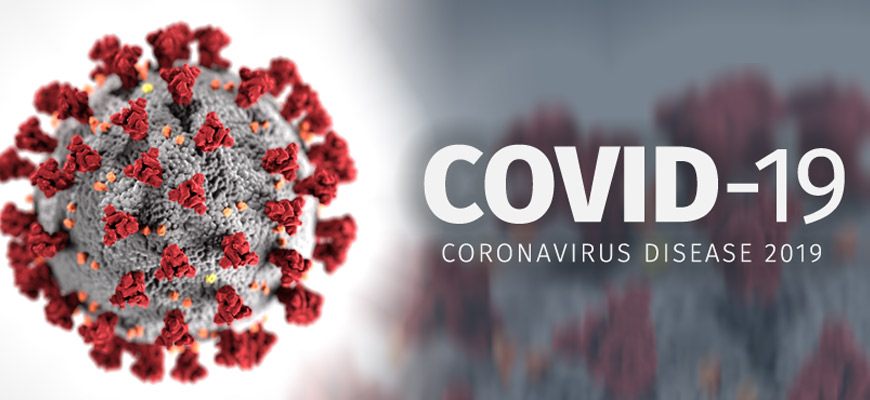

## Context
From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

Johns Hopkins University has made an excellent dashboard using the affected cases data. Data is extracted from the google sheets associated and made available here.

Edited:
Now data is available as csv files in the Johns Hopkins Github repository. Please refer to the github repository for the Terms of Use details. Uploading it here for using it in Kaggle kernels and getting insights from the broader DS community.

## Content
2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

## Column Description
Main file in this dataset is covid_19_data.csv and the detailed descriptions are below.

covid_19_data.csv

* Sno - Serial number
* ObservationDate - Date of the observation in MM/DD/YYYY
* Province/State - Province or state of the observation (Could be empty when missing)
* Country/Region - Country of observation
* Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
* Confirmed - Cumulative number of confirmed cases till that date
* Deaths - Cumulative number of of deaths till that date
* Recovered - Cumulative number of recovered cases till that date

2019_ncov_data.csv

This is older file and is not being updated now. Please use the covid_19_data.csv file

Added two new files with individual level information

COVID_open_line_list_data.csv
This file is obtained from this link

COVID19_line_list_data.csv
This files is obtained from this link

Country level datasets
If you are interested in knowing country level data, please refer to the following Kaggle datasets:
India - https://www.kaggle.com/sudalairajkumar/covid19-in-india
South Korea - https://www.kaggle.com/kimjihoo/coronavirusdataset
Italy - https://www.kaggle.com/sudalairajkumar/covid19-in-italy
Brazil - https://www.kaggle.com/unanimad/corona-virus-brazil
USA - https://www.kaggle.com/sudalairajkumar/covid19-in-usa
Switzerland - https://www.kaggle.com/daenuprobst/covid19-cases-switzerland
Indonesia - https://www.kaggle.com/ardisragen/indonesia-coronavirus-cases

## Acknowledgements
* Johns Hopkins University for making the data available for educational and academic research purposes
* MoBS lab - https://www.mobs-lab.org/2019ncov.html
* World Health Organization (WHO): https://www.who.int/
* DXY.cn. Pneumonia. 2020. http://3g.dxy.cn/newh5/view/pneumonia.
* BNO News: https://bnonews.com/index.php/2020/02/the-latest-coronavirus-cases/
* National Health Commission of the People’s Republic of China (NHC):
* http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml
* China CDC (CCDC): http://weekly.chinacdc.cn/news/TrackingtheEpidemic.htm
* Hong Kong Department of Health: https://www.chp.gov.hk/en/features/102465.html
* Macau Government: https://www.ssm.gov.mo/portal/
* Taiwan CDC: https://sites.google.com/cdc.gov.tw/2019ncov/taiwan?authuser=0
* US CDC: https://www.cdc.gov/coronavirus/2019-ncov/index.html
* Government of Canada: https://www.canada.ca/en/public-health/services/diseases/coronavirus.html
* Australia Government Department of Health: https://www.health.gov.au/news/coronavirus-update-at-a-glance
* European Centre for Disease Prevention and Control (ECDC): https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases
* Ministry of Health Singapore (MOH): https://www.moh.gov.sg/covid-19
* Italy Ministry of Health: http://www.salute.gov.it/nuovocoronavirus

Picture courtesy : Gulf Medical University

## Inspiration
Some insights could be

1. Changes in number of affected cases over time
2. Change in cases over time at country level
3. Latest number of affected cases

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
# read and view data

df = pd.read_csv('/Users/ahmedahmed/Desktop/Novel-Corona-Virus-2019/covid_19_data.csv')
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [4]:
# information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [5]:
# Data columns

df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [6]:
# Rename columns

df = df.rename(columns={'Country/Region':'Country', 'ObservationDate':'Date'})

df.columns

Index(['SNo', 'Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [7]:
# Manipulate DataFrame

df_countries = df.groupby(['Country','Date']).sum().reset_index().sort_values('Date', ascending=False)
df_countries = df_countries.drop_duplicates(subset=['Country'])
df_countries = df_countries[df_countries['Confirmed'] > 0]
df_countries.head()


Country        Date      SNo   Confirmed    Deaths  Recovered
16248    Chile  12/31/2020  3265990    608973.0   16608.0   577382.0
43477     Laos  12/31/2020   191788        41.0       0.0       40.0
35696    India  12/31/2020  7109745  10266674.0  148738.0  9860280.0
67351    Samoa  12/31/2020   191834         2.0       0.0        2.0
84615  Vanuatu  12/31/2020   191868         1.0       0.0        1.0

In [10]:
# Create the Cloropleth

fig = go.Figure(data=go.Choropleth(locations = df_countries['Country'], locationmode='country names', 
                                  z = df_countries['Confirmed'], colorscale='Reds', marker_line_color='black',
                                  marker_line_width=0.5))

fig.update_layout(title_text='Confirmed Cases as of March 28, 2020', title_x=0.5, 
                 geo={'showframe':False, 'showcoastlines':False, 
                     'projection_type':'equirectangular'})

fig.write_image('/Users/ahmedahmed/Desktop/static_choropleth.png')

fig.show()

## Animated Choropleth Map



In [9]:
# Manipulating the original dataframe

df_countrydate = df[df['Confirmed'] > 0]
df_countrydate = df_countrydate.groupby(['Date','Country']).sum().reset_index()
df_countrydate

Date             Country     SNo  Confirmed  Deaths  Recovered
0      01/01/2021         Afghanistan  192467    51526.0  2191.0    41727.0
1      01/01/2021             Albania  192468    58316.0  1181.0    33634.0
2      01/01/2021             Algeria  192469    99897.0  2762.0    67395.0
3      01/01/2021             Andorra  192470     8117.0    84.0     7463.0
4      01/01/2021              Angola  192471    17568.0   405.0    11146.0
...           ...                 ...     ...        ...     ...        ...
86455  12/31/2020             Vietnam  191870     1465.0    35.0     1325.0
86456  12/31/2020  West Bank and Gaza  191871   138004.0  1400.0   117183.0
86457  12/31/2020               Yemen  191872     2099.0   610.0     1394.0
86458  12/31/2020              Zambia  191873    20725.0   388.0    18660.0
86459  12/31/2020            Zimbabwe  191874    13867.0   363.0    11250.0

[86460 rows x 6 columns]

In [17]:
# Cresating the visualization

fig = px.choropleth(df_countrydate, locations='Country', locationmode='country names', color='Confirmed',
                   hover_name='Country', animation_frame='Date')

fig.update_layout(title_text = 'Global Spread of Coronavirus', title_x=0.5, 
                  geo={'showframe':False, 'showcoastlines':False})

fig.write_image('/Users/ahmedahmed/Desktop/animated_choropleth.pdf')

iplot(fig)